In [1]:
# In this file, we use the dataset of 120 years of Olympic history (1896-2016) to conduct exploratory data analysis.
# Some of the questions analysed include:

# Q: what are the top 10 countries that have the most athletes participated the Olympics?
# Q: What is the age distribution of the athletes?
# Q: Is there any difference in gender distribution of summer and winter Olympics?
# Q: Has female participation increased throughout the years?
# Q: What can we find from age distribution of different sports and gender groups?
# Q: Which countries won the most gold medals in total?
# Q: How did Team Australia perform in terms of the medal winning? What sports contributed the most to the medals?
# Q: WHat are the gold medal distribution of each sport and country?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#load dataset

athlets = pd.read_csv('C:/Users/qianz/OneDrive/Desktop/Projects/athlete_events.csv')
regions = pd.read_csv('C:/Users/qianz/OneDrive/Desktop/Projects/noc_regions.csv')

In [4]:
athlets.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
#join the dataframes

athletes_df = athlets.merge(regions, how='left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
athletes_df.shape

(271116, 17)

In [8]:
# column names consistent

athletes_df.rename(columns={'region':'Region','notes':'Notes'}, inplace= True)

In [9]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [10]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [11]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
#check nulls

nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [13]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [14]:
# China details

athletes_df.query('Team=="China"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [15]:
# Australia details

athletes_df.query('Team=="Australia"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
274,143,"Desmond ""Des"" Abbott",M,21.0,184.0,87.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,Bronze,Australia,NaN
453,252,Youcef Abdi,M,30.0,178.0,66.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN,Australia,NaN
454,252,Youcef Abdi,M,34.0,178.0,66.0,Australia,AUS,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN,Australia,NaN
470,257,Ali Abdo,M,19.0,169.0,74.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",NaN,Australia,NaN
471,257,Ali Abdo,M,23.0,169.0,74.0,Australia,AUS,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN,Australia,NaN


In [16]:
# top 10 countries participating since 1896

top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Participation by Country 1896-2016'}, ylabel='Team'>

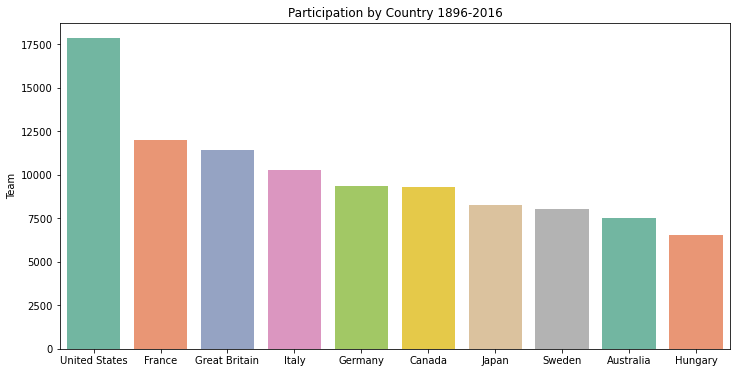

In [17]:
# plot for the top 10 participanting countries

plt.figure(figsize=(12,6))
plt.title('Participation by Country 1896-2016')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

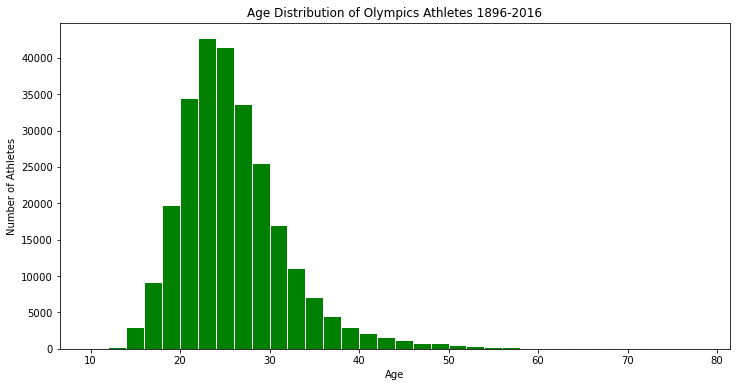

In [18]:
# age distribution of the athlets

plt.figure(figsize=(12,6))
plt.title('Age Distribution of Olympics Athletes 1896-2016')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.hist(athletes_df.Age, bins=np.arange(10,80,2),color='green',edgecolor='white')

In [19]:
# separate into winter sports and summer sports

winter_sports = athletes_df[athletes_df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [20]:
summer_sports = athletes_df[athletes_df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [21]:
# female and male athletes

gender_counts = athletes_df.Sex.value_counts()
gender_counts


M    196594
F     74522
Name: Sex, dtype: int64

<Figure size 864x432 with 0 Axes>

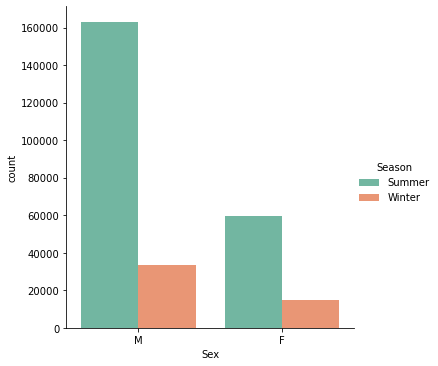

In [22]:
plt.figure(figsize=(12,6))
# plt.title('Olympic Athletes Gender Season Distribution')
# plt.ylabel('Number of Athletes')
sns.catplot(x='Sex', kind='count',hue='Season', data=athletes_df, palette='Set2')

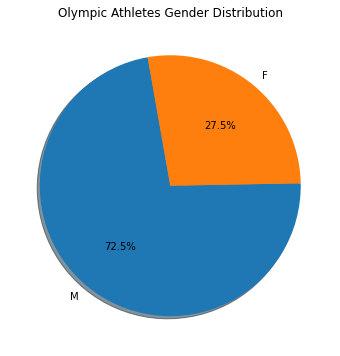

In [23]:
plt.figure(figsize=(12,6))
plt.title('Olympic Athletes Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',startangle=100, shadow=True);

In [24]:
# total medals

athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [25]:
# total number of female athletes in each olympics

female_oly = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex','Year']]
                                                                                
female_count = female_oly.groupby('Year').count().reset_index()
female_count                                                                                

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


Text(0.5, 1.0, 'Number of Female Athletes in Olympics from 1900')

<Figure size 3600x1080 with 0 Axes>

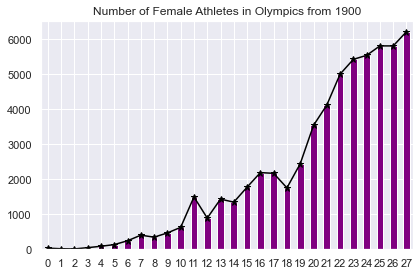

In [26]:
sns.set(style='darkgrid')
plt.figure(figsize=(50,15))
plt.rcParams["figure.autolayout"] = True
fig, ax=plt.subplots()

female_count['Sex'].plot(kind='bar', color='purple')
female_count['Sex'].plot(kind='line',marker='*',color='black', ms=7)

plt.title('Number of Female Athletes in Olympics from 1900')


Text(0.5, 1.0, 'Number of Female Athletes in Olympics from 1900')

<Figure size 1440x0 with 0 Axes>

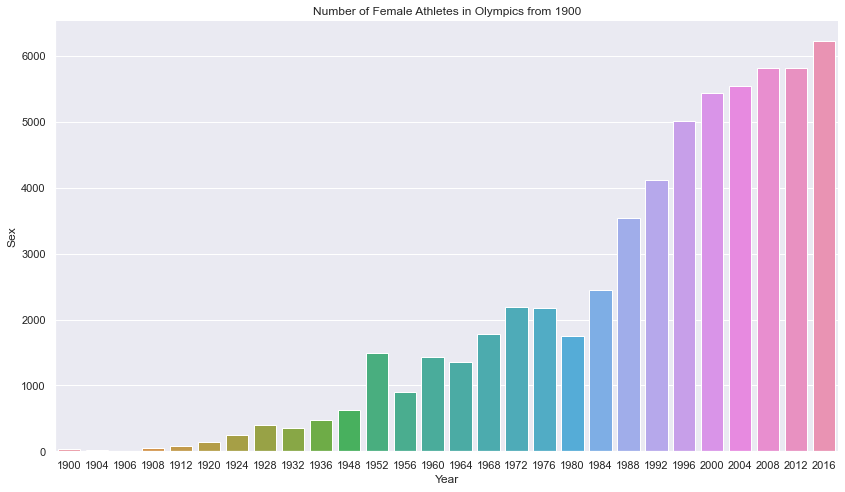

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,0))
sns.catplot(x='Year', y='Sex', data=female_count, kind='bar', height=7, aspect=1.7)
plt.title('Number of Female Athletes in Olympics from 1900')


In [28]:
# gold medalists

gold_athletes = athletes_df[athletes_df.Medal=='Gold']
gold_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [29]:
# pick the ones only with age info
gold_athletes = gold_athletes[np.isfinite(gold_athletes['Age'])]

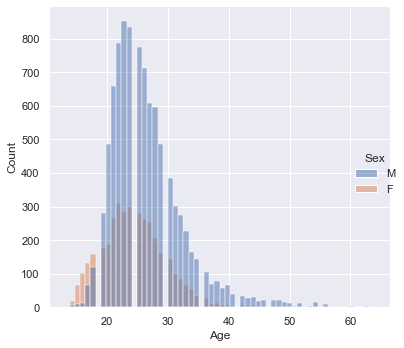

In [30]:
sns.displot(x='Age', data=gold_athletes, hue='Sex', bins=60)

# Female athletes were mostly younger than 40 years old, and were mainly in their 20s.
# Male athletes were mostly younger than 50 years old, and were mainly in their 20-35.

In [31]:
# how many athletes won the gold medal when they were older than 60 year-old? 

gold_athletes['ID'][gold_athletes['Age']>60].nunique()


6

In [32]:
# Wow. 6 in total.
# which sports were they in?
gold_athletes['Sport'][gold_athletes['Age']>60]

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

In [33]:
top_sport_list = list(gold_athletes['Sport'].value_counts().reset_index().head(5)['index'])
top_sport_list 

['Athletics', 'Swimming', 'Rowing', 'Gymnastics', 'Fencing']

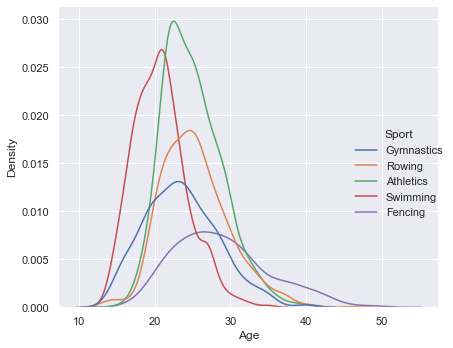

In [34]:
# what are the age distribution of each sports?

gold_ath_age_sport = gold_athletes[gold_athletes['Sport'].isin(top_sport_list)]

sns.displot(gold_ath_age_sport, x='Age', kind='kde', hue='Sport');

In [35]:
# Among the sports with the most participating athletes, the average age of fencing gold medalists is the highest, which is around 28-year-old.
# The youngest average group is swimming gold medalists, around 20-year-old.

In [36]:
# country distribution of gold medals

gold_md_country = gold_athletes.Team.value_counts().reset_index(name='Golds').head(12)
gold_md_country

,index,Golds
0,United States,2472
1,Soviet Union,1058
2,Germany,676
3,Italy,534
4,Great Britain,515
5,France,453
6,Sweden,451
7,Hungary,432
8,Canada,421
9,East Germany,369


Text(0.5, 1.0, 'Olympic Gold Medals per Country 1896-2016')

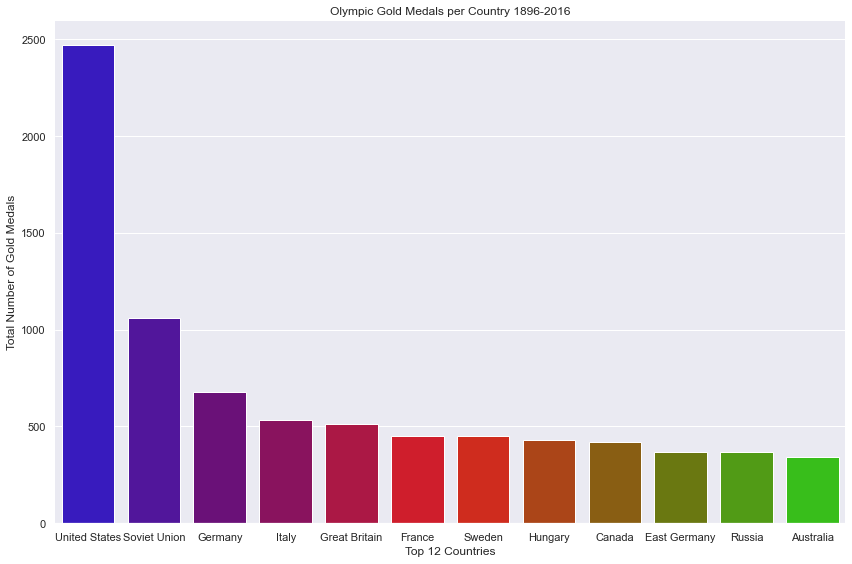

In [37]:
g = sns.catplot(x='index', y='Golds', data=gold_md_country, kind='bar', palette='brg', height=8, aspect=1.5)

g.despine(left=True)
g.set_xlabels('Top 12 Countries')
g.set_ylabels('Total Number of Gold Medals')
plt.title('Olympic Gold Medals per Country 1896-2016')

In [38]:
gold_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [39]:
# Australia is number 12! Let's see which sport contributed the most? My guess is swimming.

aus_gold = gold_athletes[gold_athletes['Region']=='Australia']
aus_gold.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
2756,1534,Brett Aitken,M,29.0,173.0,65.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Cycling,Cycling Men's Madison,Gold,Australia,NaN
4996,2850,"Kate Ruth ""Katie"" Allen",F,26.0,170.0,65.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Women's Hockey,Gold,Australia,NaN
6830,3831,John Edward Anderson,M,33.0,183.0,89.0,Australia,AUS,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Two Person Keelboat,Gold,Australia,NaN
6879,3864,"Thomas James ""Tom"" Anderson",M,33.0,183.0,89.0,Australia,AUS,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,Gold,Australia,NaN
7436,4163,"Michelle ""Shelley"" Andrews (-Mitchell)",F,24.0,168.0,59.0,Australia,AUS,1996 Summer,1996,Summer,Atlanta,Hockey,Hockey Women's Hockey,Gold,Australia,NaN


In [40]:
aus_gold_sports = aus_gold.Sport.value_counts().reset_index().head(10)
aus_gold_sports

,index,Sport
0,Swimming,121
1,Hockey,64
2,Cycling,26
3,Athletics,24
4,Rowing,22
5,Sailing,22
6,Equestrianism,18
7,Rugby,15
8,Water Polo,13
9,Rugby Sevens,12


Text(0.5, 1.0, 'Sports Distribution of Olympic Gold Medals of Australian Athletes 1896-2016')

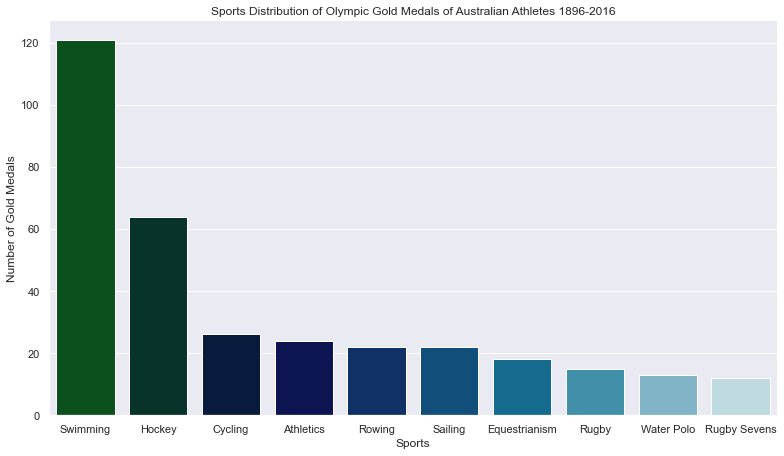

In [41]:
g = sns.catplot(x='index', y='Sport', data=aus_gold_sports, kind='bar', palette='ocean', height=6.5, aspect=1.7)

g.set_xlabels('Sports')
g.set_ylabels('Number of Gold Medals')
plt.title('Sports Distribution of Olympic Gold Medals of Australian Athletes 1896-2016')

In [42]:
# yes. Swimming it is!

In [43]:
# Rio Olympics

In [44]:
max_year = athletes_df.Year.max()
print(max_year)

team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal=='Gold')].Team

team_names_10 = team_names.value_counts().head(10)

2016


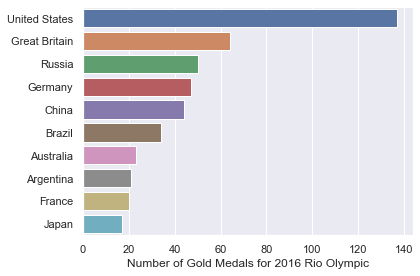

In [45]:
sns.barplot(x=team_names_10, y=team_names_10.index)

plt.xlabel('Number of Gold Medals for 2016 Rio Olympic')
plt.ylabel(None);

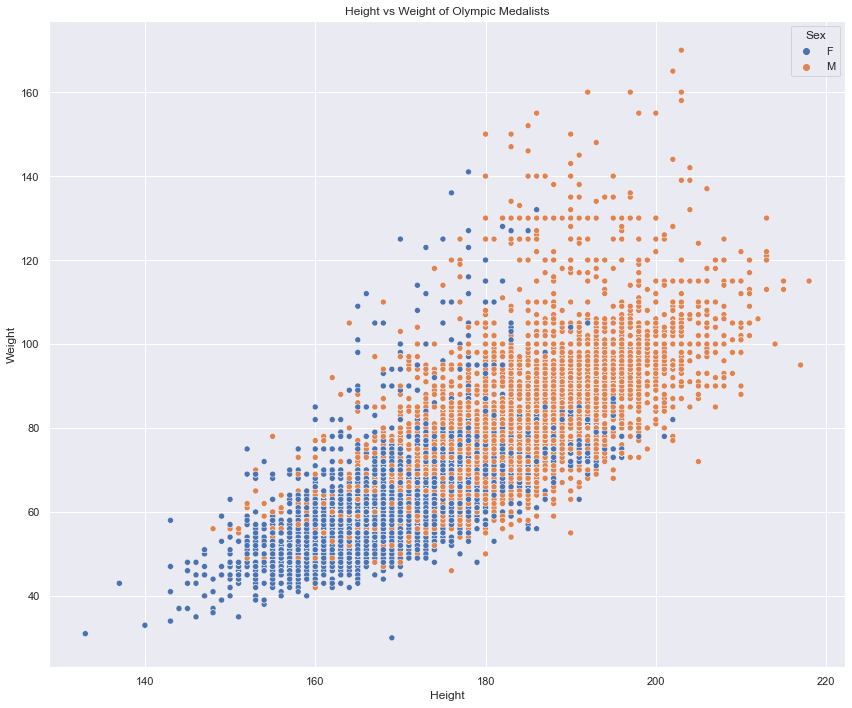

In [46]:
not_null_medals = athletes_df[(athletes_df['Year']==2016) & pd.notnull(athletes_df['Height']) & (pd.notnull(athletes_df['Weight']))]

plt.figure(figsize=(12,10))
axis = sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex')
plt.title('Height vs Weight of Olympic Medalists');

In [47]:
# Rio: Gold medal sports distribution

In [48]:
rio_gold = gold_athletes[gold_athletes.Year==2016]

rio_gold_sport_count = rio_gold.Sport.value_counts().reset_index()
rio_gold_sport_count

,index,Sport
0,Swimming,71
1,Athletics,66
2,Rowing,48
3,Football,35
4,Hockey,34
5,Handball,29
6,Canoeing,27
7,Cycling,27
8,Water Polo,26
9,Rugby Sevens,25


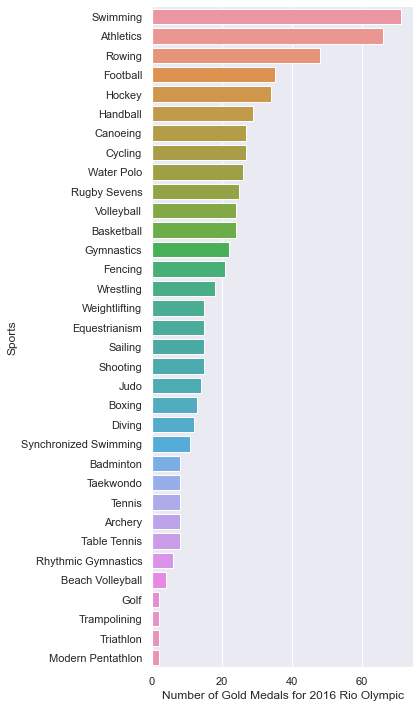

In [49]:
sns.catplot(y='index', x='Sport', data=rio_gold_sport_count, kind='bar', height = 10, aspect=0.6);

plt.xlabel('Number of Gold Medals for 2016 Rio Olympic')
plt.ylabel('Sports');